In [ ]:
!nvidia-smi

Wed Sep 11 12:26:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   44C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -q supervision roboflow

In [ ]:
from google.colab import files

# Create an upload interface
uploaded = files.upload()  # Follow the prompt to upload 'Deep Learning.v5i.yolov8.zip'

Saving Deep Learning.v5i.yolov8.zip to Deep Learning.v5i.yolov8.zip


In [ ]:
import zipfile
import os

# Specify the path to your zip file
zip_path = '/content/Deep Learning.v5i.yolov8.zip'
# Specify the directory where you want to extract the contents
extract_to = '/content'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Verify that the files have been extracted
print("Files in the extraction directory:")
print(os.listdir(extract_to))

Files in the extraction directory:
['.config', 'train', 'valid', 'Deep Learning.v5i.yolov8.zip', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'data.yaml', 'sample_data']


In [ ]:
import yaml

# Specify the path to your data.yaml file
yaml_path = '/content/data.yaml'

# Load the current data.yaml content
with open(yaml_path, 'r') as file:
    data_config = yaml.safe_load(file)

# Update the paths for train, val, and test datasets
data_config['train'] = '/content/train/images'  # Assuming images are directly under train/
data_config['val'] = '/content/valid/images'    # Assuming images are directly under valid/
data_config['test'] = '/content/test/images'    # Assuming images are directly under test/

# Optional: If you need specific paths for labels
data_config['train_labels'] = '/content/train/labels'  # Adjust if you have a separate labels directory
data_config['val_labels'] = '/content/valid/labels'    # Adjust if you have a separate labels directory
data_config['test_labels'] = '/content/test/labels'    # Adjust if you have a separate labels directory

# Save the updated data.yaml file
with open(yaml_path, 'w') as file:
    yaml.dump(data_config, file)

# Verify the update
with open(yaml_path, 'r') as file:
    updated_data = yaml.safe_load(file)
print(updated_data)

{'names': ['Acanthurus-Nigrofuscus', 'Atlantic-Cod', 'Balkan-Wrasse', 'Brill', 'Brown-Crab', 'Jelly-Fish', 'Pollock', 'Poor-Cod', 'Shrimp'], 'nc': 9, 'roboflow': {'license': 'CC BY 4.0', 'project': 'deep-learning-v65y2', 'url': 'https://universe.roboflow.com/gabriel-2x89o/deep-learning-v65y2/dataset/5', 'version': 5, 'workspace': 'gabriel-2x89o'}, 'test': '/content/test/images', 'test_labels': '/content/test/labels', 'train': '/content/train/images', 'train_labels': '/content/train/labels', 'val': '/content/valid/images', 'val_labels': '/content/valid/labels'}


In [ ]:
import os
HOME = os.getcwd()
!mkdir -p {HOME}/weights

# Downloading all available pre-trained weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt

# Verify the downloaded files
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt


In [ ]:
import os

# Subdirectories to check
subdirs = ['/content/train/images', '/content/train/labels',
           '/content/valid/images', '/content/valid/labels',
           '/content/test/images', '/content/test/labels']

# List contents of each subdirectory
for subdir in subdirs:
    print(f"Contents of {subdir}:")
    if os.path.exists(subdir):
        files = os.listdir(subdir)
        # Print only the first five files in the subdirectory
        print(files[:5])
    else:
        print("Subdirectory does not exist.")
    print("\n---\n")

Contents of /content/train/images:
['IMG_1191_PNG.rf.21782ad9f133472269c2dc915b62e4d9.jpg', 'IMG_1224_PNG.rf.f5f4d15506a0a92c88070076d8657da2.jpg', 'IMG_0724_PNG.rf.dc9e554292c58f8aa9e47e413e50ddda.jpg', 'IMG_0917_PNG.rf.e6e07fe10ee6f0f13418d9f878ad6649.jpg', 'IMG_0984_PNG.rf.8b2d5fbcc22ebe648dacd9f0c3716dba.jpg']

---

Contents of /content/train/labels:
['IMG_0676_jpg.rf.a0b48c84b4c74aae9dc4e6c3de8e95b1.txt', 'IMG_0835_PNG.rf.74db79756e6d3069e13100887abc2841.txt', 'IMG_1619_jpeg.rf.521ab23bad8c9168606e1419c569eb3b.txt', 'IMG_0649_jpg.rf.8f9c2e33f1f4fdb1b2a1e3d949a24b8f.txt', 'IMG_1764_PNG.rf.340292cd29798d7dab2d26770bec2d9d.txt']

---

Contents of /content/valid/images:
['IMG_0529_PNG.rf.8d44f40b1bc52edbab29f5f3e6c334b4.jpg', 'IMG_1631_jpeg.rf.14144fabd5acd73552d0501832c0690c.jpg', 'IMG_0838_PNG.rf.1805905b548f30d3740baa5eb62a40e5.jpg', 'IMG_1230_PNG.rf.0d97ba9934b4d445362c70837352e525.jpg', 'sample379_png.rf.14a0b604ef80a63e01d2155671045b25.jpg']

---

Contents of /content/valid/labe

In [ ]:
# Navigate to the home directory where your training script or executable command is located
%cd /content

# Command to start training YOLOv10 with your dataset
!yolo task=detect mode=train epochs=50 batch=16 plots=True \
model=/content/weights/yolov10n.pt \
data=/content/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New h

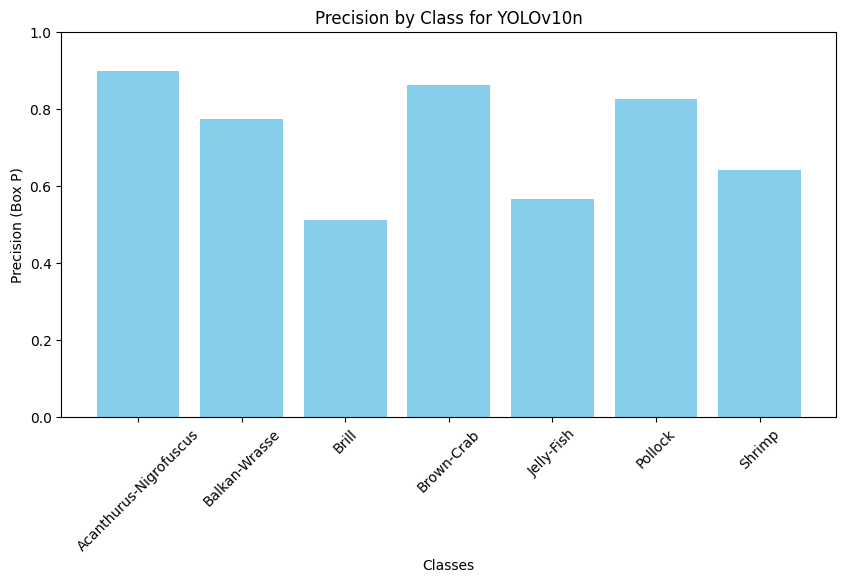

In [ ]:
# Precision

import matplotlib.pyplot as plt

classes = ['Acanthurus-Nigrofuscus', 'Balkan-Wrasse', 'Brill', 'Brown-Crab', 'Jelly-Fish', 'Pollock', 'Shrimp']
precisions = [0.899, 0.774, 0.511, 0.862, 0.565, 0.825, 0.641]  # Precision values

plt.figure(figsize=(10, 5))
plt.bar(classes, precisions, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Precision (Box P)')
plt.title('Precision by Class for YOLOv10n')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to show scale up to 1
plt.show()

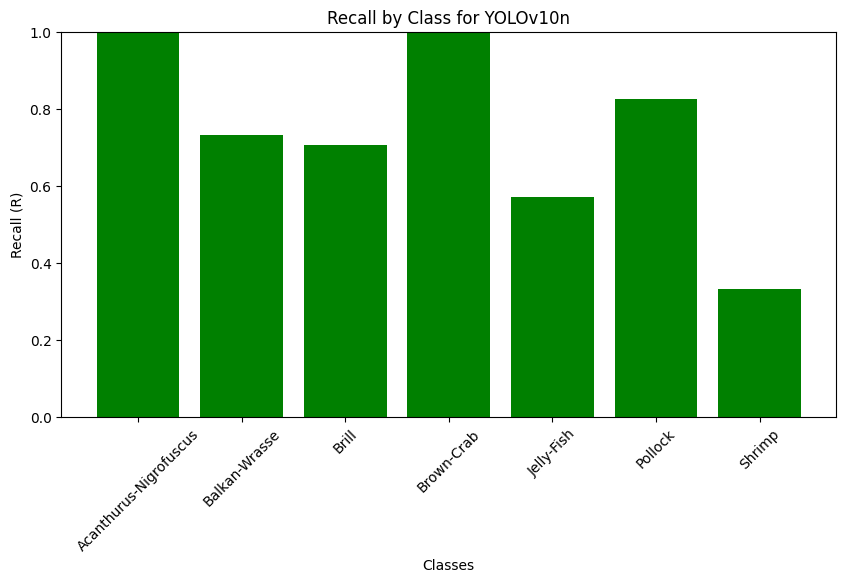

In [ ]:
# Recall
recalls = [1.0, 0.733, 0.706, 1.0, 0.571, 0.825, 0.333]  # Recall values

plt.figure(figsize=(10, 5))
plt.bar(classes, recalls, color='green')
plt.xlabel('Classes')
plt.ylabel('Recall (R)')
plt.title('Recall by Class for YOLOv10n')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to show scale up to 1
plt.show()

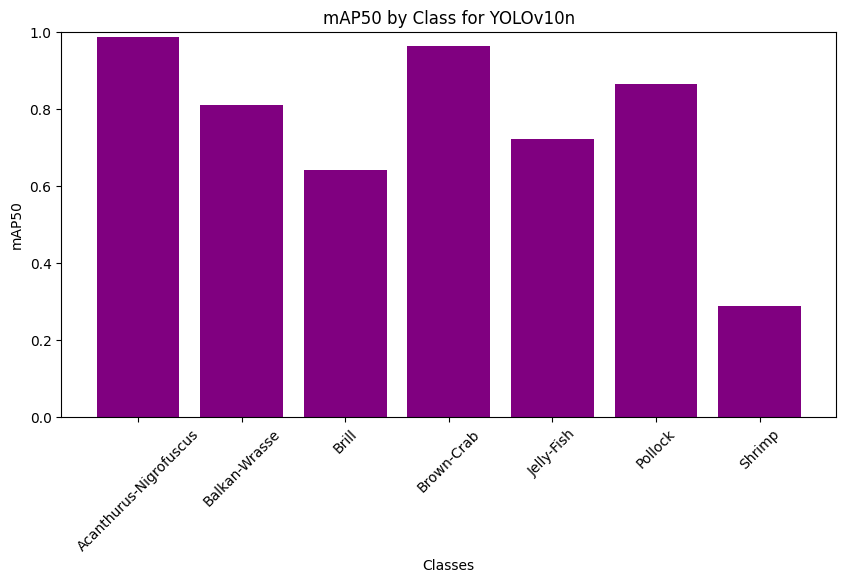

In [ ]:
#mAP50

mAP50 = [0.986, 0.811, 0.641, 0.963, 0.723, 0.865, 0.288]  # mAP50 values

plt.figure(figsize=(10, 5))
plt.bar(classes, mAP50, color='purple')
plt.xlabel('Classes')
plt.ylabel('mAP50')
plt.title('mAP50 by Class for YOLOv10n')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to show scale up to 1
plt.show()

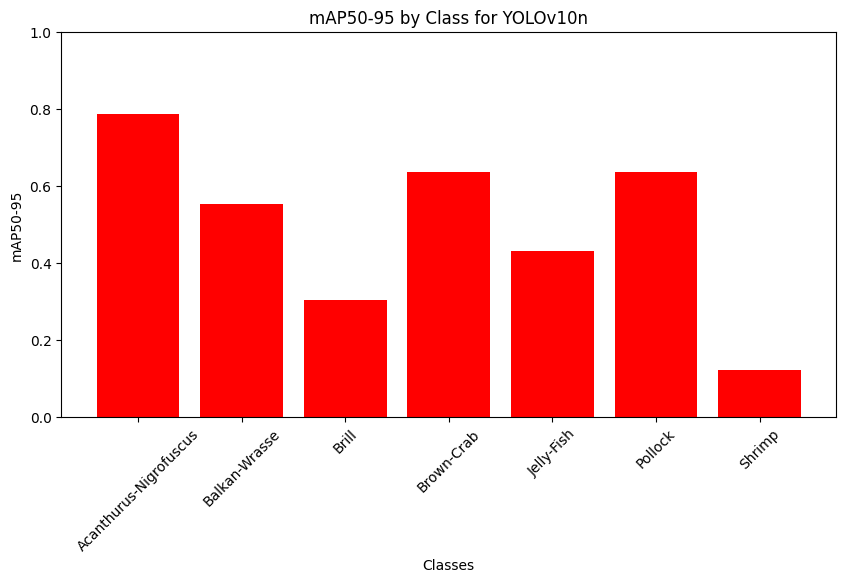

In [ ]:
#mAP50-95

mAP50_95 = [0.786, 0.553, 0.303, 0.637, 0.431, 0.636, 0.121]  # mAP50-95 values

plt.figure(figsize=(10, 5))
plt.bar(classes, mAP50_95, color='red')
plt.xlabel('Classes')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 by Class for YOLOv10n')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to show scale up to 1
plt.show()